In [30]:
import data
from datapreprocessing import preprocess

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import manipulation

In [14]:
preprocess()

/Users/reecelance/Desktop/a-data-analytics-approach-to-fantasy-football-management/python/datapreprocessing.py:312: FutureWarning: The default value of regex will change from True to False in a future version.
  data.gameweek_fixture_df['full_name'] = data.gameweek_fixture_df.name.str.replace('_\d+','')
/Users/reecelance/Desktop/a-data-analytics-approach-to-fantasy-football-management/python/datapreprocessing.py:313: FutureWarning: The default value of regex will change from True to False in a future version.
  data.gameweek_fixture_df['full_name'] = data.gameweek_fixture_df['full_name'].str.replace(" ", "_").str.replace("-", "_").str.replace('_\d+','')


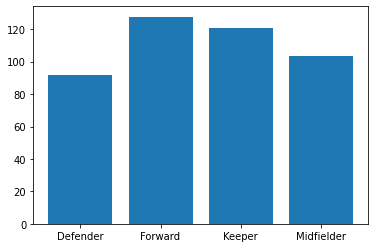

In [26]:
values = []
positions = []
for pos, players in data.players_df.groupby(by='position'):
    players = players[players['minutes'] > ((38*90)/2)]
    positions.append(pos)
    values.append(players.total_points.sum() / len(players))

plt.bar(positions, values)
plt.show()

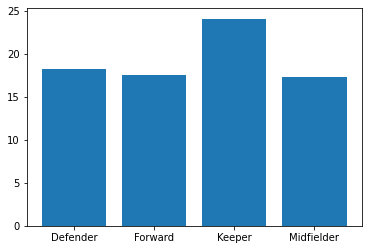

In [27]:
values = []
positions = []
for pos, players in data.players_df.groupby(by='position'):
    players = players[players['minutes'] > ((38*90)/2)]
    positions.append(pos)
    values.append(players.value_season.sum() / len(players))

plt.bar(positions, values)
plt.show()

In [28]:
def getCurrentSeasonsDf(this_season_player_df, last_season_player_df):
    last_season_player_df = last_season_player_df[last_season_player_df.minutes > 0]
    last_season_player_df.rename(columns={'total_points': "prev_total_points"}, inplace=True)
    
    players_df = pd.merge(last_season_player_df, this_season_player_df[['full_name', "total_points"]], on='full_name', how='left')
    
    manipulation.dropEmptyValueRow(players_df)
    
    return players_df.reset_index(drop='index')

In [51]:
def listOfColumns(df, cols):
    list_of_columns = []
    for col in cols:
        list_of_columns.append(df[col])
    return list_of_columns

assists 0.44316261127566403
bonus 0.5465555598026259
bps 0.5768349822466603
clean_sheets 0.5395667425152016
creativity 0.4474038857814362
goals_scored 0.45654032177091475
ict_index 0.591068252052665
influence 0.5858819323381953
minutes 0.525881168808513
points_per_game 0.5074412292680894
selected_by_percent 0.4721620352388853
threat 0.4802375563026387
prev_total_points 0.625548791538455
transfers_in 0.4247435655372463
transfers_out 0.42224979792226164
value_season 0.5233573415538699
starting_cost 0.4833828837642417
cost_bin 0.4418573139197163


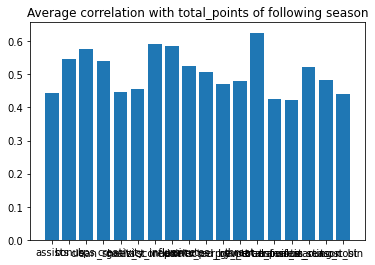

In [85]:
seasonal_data = pd.DataFrame(columns=['total_points', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed', 'penalties_saved', 'points_per_game', 'red_cards', 'saves', 'selected_by_percent', 'team_code', 'threat', 'prev_total_points', 'transfers_in', 'transfers_out', 'value_season', 'yellow_cards', 'season_num', 'starting_cost', 'cost_bin'])
seasons = ['1617', '1718', '1819', '1920', '2021', '2122']
for season in range(1, len(seasons)):
    seasonal_data = pd.concat([getCurrentSeasonsDf(data.players_df[data.players_df['season'] == seasons[season]], data.players_df[data.players_df['season'] == seasons[season-1]])[['total_points', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed', 'penalties_saved', 'points_per_game', 'red_cards', 'saves', 'selected_by_percent', 'team_code', 'threat', 'prev_total_points', 'transfers_in', 'transfers_out', 'value_season', 'yellow_cards', 'season_num', 'starting_cost', 'cost_bin']], seasonal_data])

manipulation.dropEmptyValueRow(seasonal_data)
seasonal_data = seasonal_data.astype(float)

columns = []
correlations = []
for col in seasonal_data.keys():
    correlation = seasonal_data['total_points'].corr(seasonal_data[col])
    if col != 'total_points' and correlation > 0.4:
        print(col, correlation)
        columns.append(col)
        correlations.append(seasonal_data['total_points'].corr(seasonal_data[col]))

plt.bar(columns, correlations)
plt.title('Average correlation with total_points of following season')
plt.show()